In [1]:
import numpy as np
import pandas as pd
import wandb
import my28brains.viz as viz
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.hyperbolic import Hyperbolic

import os
os.getcwd()

INFO: Using numpy backend


'/Users/adelemyers/code/my28brains'

In [2]:
import pandas as pd 
import wandb
api = wandb.Api()

tag = "2023-10-25"

# Project is specified by <entity/project-name>
runs = api.runs("bioshape-lab/my28brains-my28brains", filters={"tags": tag})

print(f"runs shape {len(runs)}")


# start_date = pd.to_datetime("2023-10-23")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

summary_df = pd.DataFrame.from_dict(
    summary_list)
config_df = pd.DataFrame.from_dict(
    config_list)
name_df = pd.DataFrame.from_dict(
    name_list)

runs_df = pd.concat([summary_df, config_df, name_df], axis = 1)

runs_df.to_csv(f"my28brains/notebooks/csv/project{tag}.csv")

runs shape 5182


In [2]:
df = pd.read_csv("my28brains/notebooks/csv/project2023-10-25.csv")
df = df.dropna(axis=1, how='all')
print(f"number of runs: {len(df['dataset_name'])}")
df.head()

number of runs: 5186


Unnamed: 0  noise_factor  \
0           0           NaN   
1           1           0.2   
2           2           0.2   
3           3           0.2   
4           4           0.2   

                            gr_linear_residuals_hist  \
0                                                NaN   
1  {'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...   
2                                                NaN   
3  {'values': [1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1...   
4  {'_type': 'histogram', 'bins': [-0.14431596327...   

                                           true_coef    _timestamp  \
0                                                NaN           NaN   
1  [3.1954475256573662, 1.2659835120415546, 1.058...  1.698350e+09   
2  [2.143691531548964, 1.1211364684305278, 1.1197...  1.698350e+09   
3  [0.5054776609671856, 0.6854569994882734, 0.138...  1.698350e+09   
4  [0.30819188498582417, 0.27014702401036017, 0.4...  1.698350e+09   

  linear_noise                                  gr_geod_residuals  \
0          NaN                                                NaN   
1        False  {'_type': 'histogram', 'bins': [0.051177449038...   
2        False                                                NaN   
3        False  {'_type': 'histogram', 'bins': [0.007718255817...   
4        False  {'_type': 'histogram', 'bins': [0.006632253208...   

           _wandb                                                  y  \
0             NaN                                                NaN   
1  {'runtime': 9}  {'bins': [-0.024781529462480315, 0.17055562247...   
2  {'runtime': 6}  {'values': [17, 26, 48, 70, 79, 61, 56, 39, 36...   
3  {'runtime': 7}  {'values': [6, 36, 41, 25, 23, 10, 11, 12, 15,...   
4  {'runtime': 7}  {'bins': [0.2171861058147606, 0.26123943870930...   

   geodesic_duration_time  ...  full_run  tol_factor  dataset_name  \
0                     NaN  ...       NaN         NaN           NaN   
1                2.098130  ...      True       0.001   hyperboloid   
2                     NaN  ...     False       0.001   hyperboloid   
3                0.641882  ...      True       0.001   hyperboloid   
4                0.522934  ...      True       0.001   hyperboloid   

  linear_noise.1  noise_factor.1 space_dimension  linear_residuals  \
0            NaN             NaN             NaN               NaN   
1          False             0.2            10.0             False   
2          False             0.2             5.0             False   
3          False             0.2             3.0             False   
4          False             0.2             2.0             False   

   project_linear_noise  geodesic_initialization.1                  0  
0                   NaN                        NaN  crisp-disco-14952  
1                  True                 warm_start       run_ssjcwora  
2                  True                 warm_start       run_zmap2fr3  
3                  True                 warm_start       run_h26ad62a  
4                  True                 warm_start       run_byt19se5  

[5 rows x 38 columns]

# Add/delete columns to df

In [3]:
df["linear_residuals_colors"] = df["linear_residuals"]*1
df["linear_noise_colors"] = df["linear_noise"]*1
print(df.columns)

Index(['Unnamed: 0', 'noise_factor', 'gr_linear_residuals_hist', 'true_coef',
       '_timestamp', 'linear_noise', 'gr_geod_residuals', '_wandb', 'y',
       'geodesic_duration_time', 'n_geod_function_evaluations', '_runtime',
       'rmsd_geod', 'y_pred_for_gr', 'n_geod_jacobian_evaluations',
       'gr_linear_residuals', 'geodesic_intercept_err', 'nrmsd_geod',
       'n_geod_iterations', 'gr_geod_residuals_hist',
       'geodesic_initialization', '_step', 'true_intercept', 'geodesic_tol',
       'y_noiseless', 'geodesic_coef_err', 'line vs geodesic', 'n_X',
       'full_run', 'tol_factor', 'dataset_name', 'linear_noise.1',
       'noise_factor.1', 'space_dimension', 'linear_residuals',
       'project_linear_noise', 'geodesic_initialization.1', '0',
       'linear_residuals_colors', 'linear_noise_colors'],
      dtype='object')


# Parameters to fix

In [4]:
dataset_name = "hypersphere"
n_X = 30
dim1 = 2
dim2 = 3
dim3 = 5
dim4 = 10
# noise_type = "geodesic"
project_linear_noise = True

df_space = df[df["dataset_name"] == dataset_name]
print(df_space.columns)

df_space = df_space[df_space["project_linear_noise"]==project_linear_noise]



df1 = df_space[df_space["space_dimension"] == dim1]
df2 = df_space[df_space["space_dimension"] == dim2]
df3 = df_space[df_space["space_dimension"] == dim3]
df4 = df_space[df_space["space_dimension"] == dim4]
dfs = [df1, df2, df3, df4]

# df1 = df1[df1["linear_noise"] == (noise_type == "linear")]

Index(['Unnamed: 0', 'noise_factor', 'gr_linear_residuals_hist', 'true_coef',
       '_timestamp', 'linear_noise', 'gr_geod_residuals', '_wandb', 'y',
       'geodesic_duration_time', 'n_geod_function_evaluations', '_runtime',
       'rmsd_geod', 'y_pred_for_gr', 'n_geod_jacobian_evaluations',
       'gr_linear_residuals', 'geodesic_intercept_err', 'nrmsd_geod',
       'n_geod_iterations', 'gr_geod_residuals_hist',
       'geodesic_initialization', '_step', 'true_intercept', 'geodesic_tol',
       'y_noiseless', 'geodesic_coef_err', 'line vs geodesic', 'n_X',
       'full_run', 'tol_factor', 'dataset_name', 'linear_noise.1',
       'noise_factor.1', 'space_dimension', 'linear_residuals',
       'project_linear_noise', 'geodesic_initialization.1', '0',
       'linear_residuals_colors', 'linear_noise_colors'],
      dtype='object')


# Paper Figs

1. RMSD linear as a function of noise level

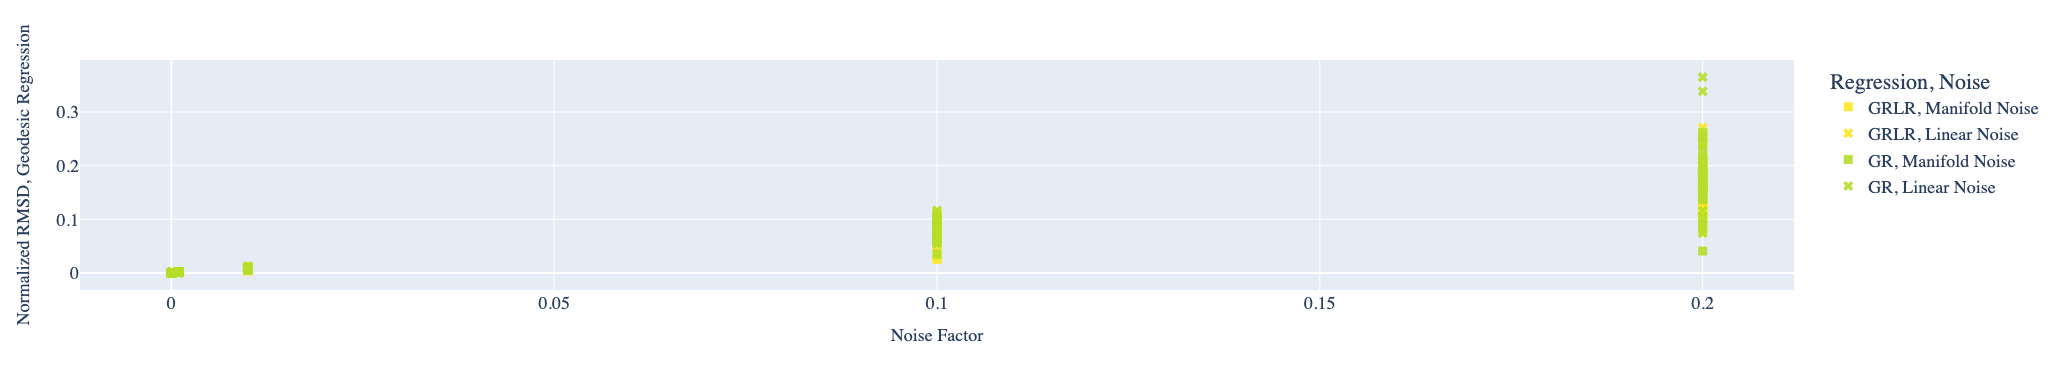

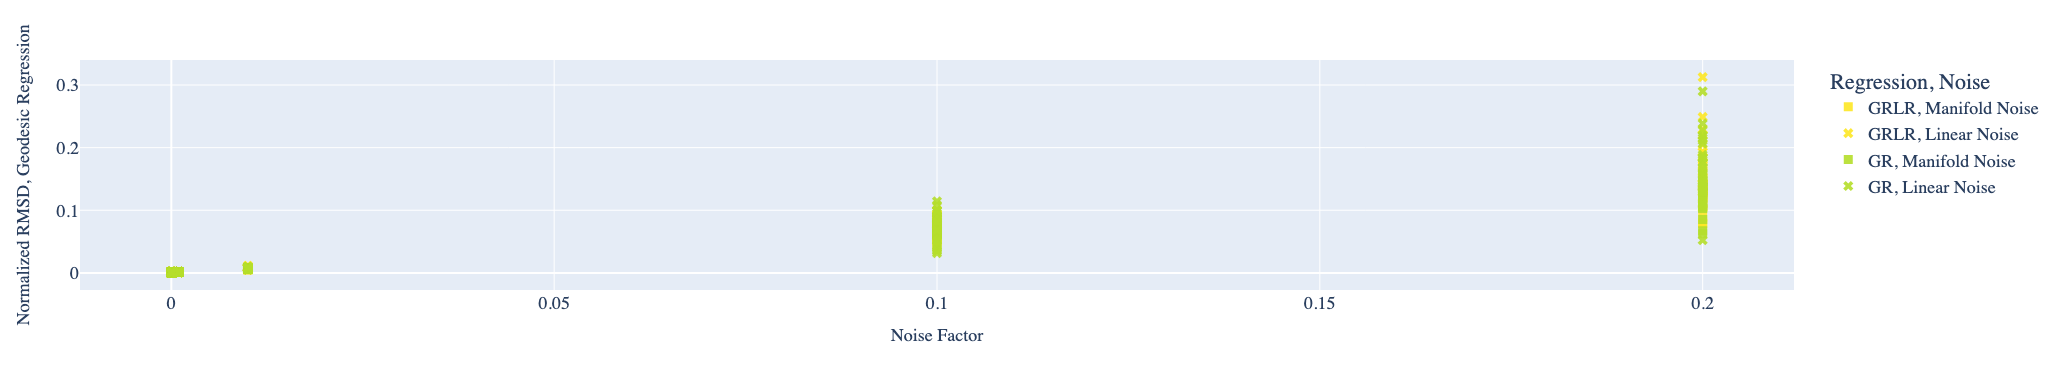

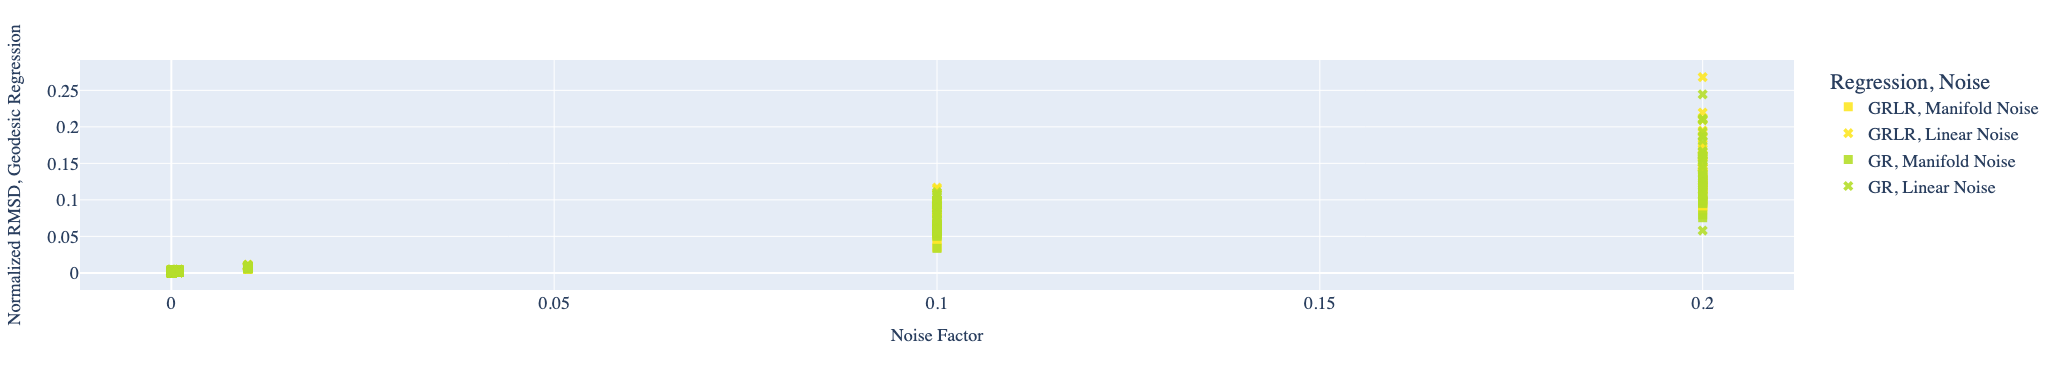

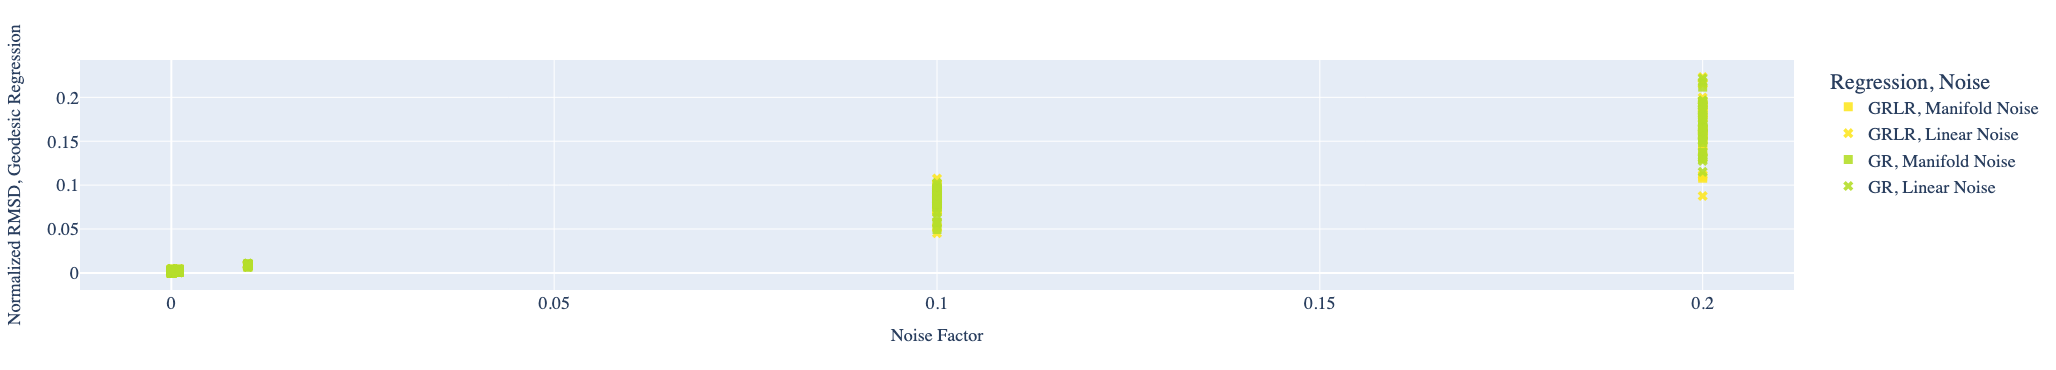

In [5]:
for df in dfs:
    fig = viz.scatterplot_evaluation(
        df= df,
        colored_by="linear_residuals",
        marked_by="linear_noise",
        x_label= "noise_factor",   #"geodesic_duration_time",
        y_label="nrmsd_geod",
    )

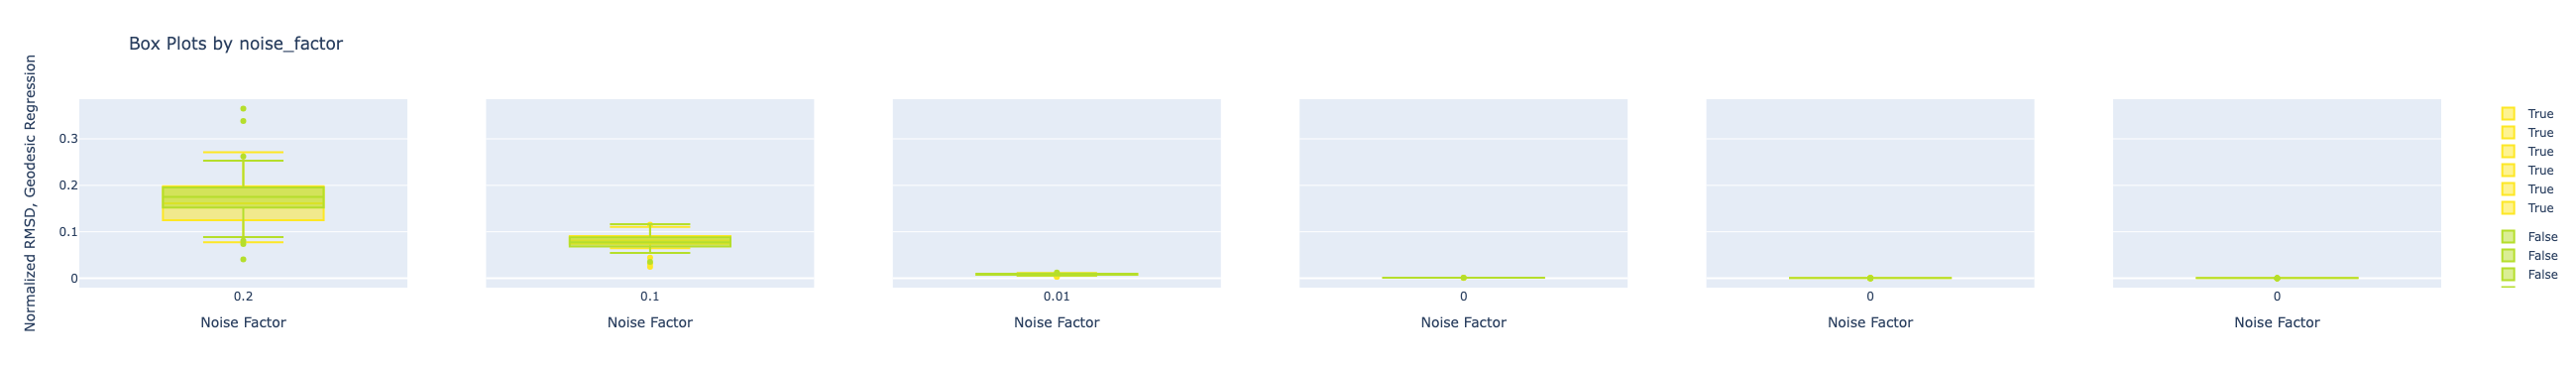

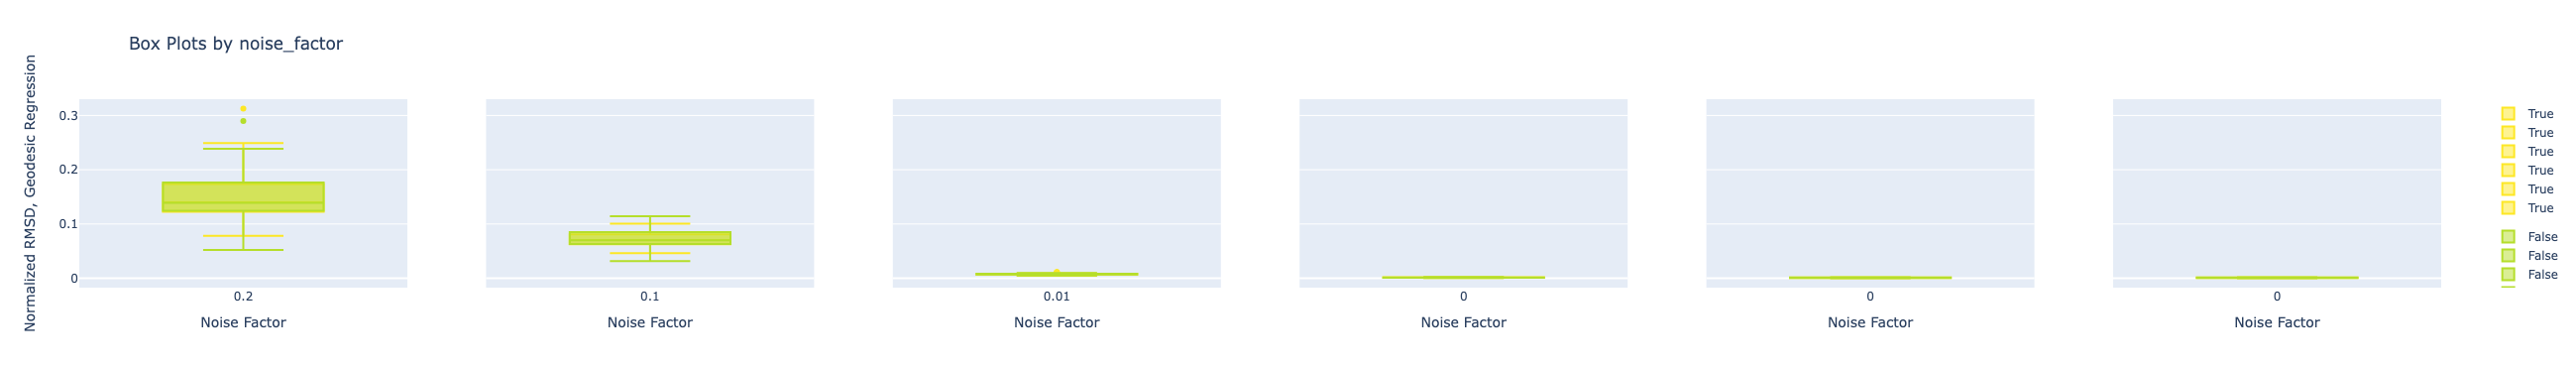

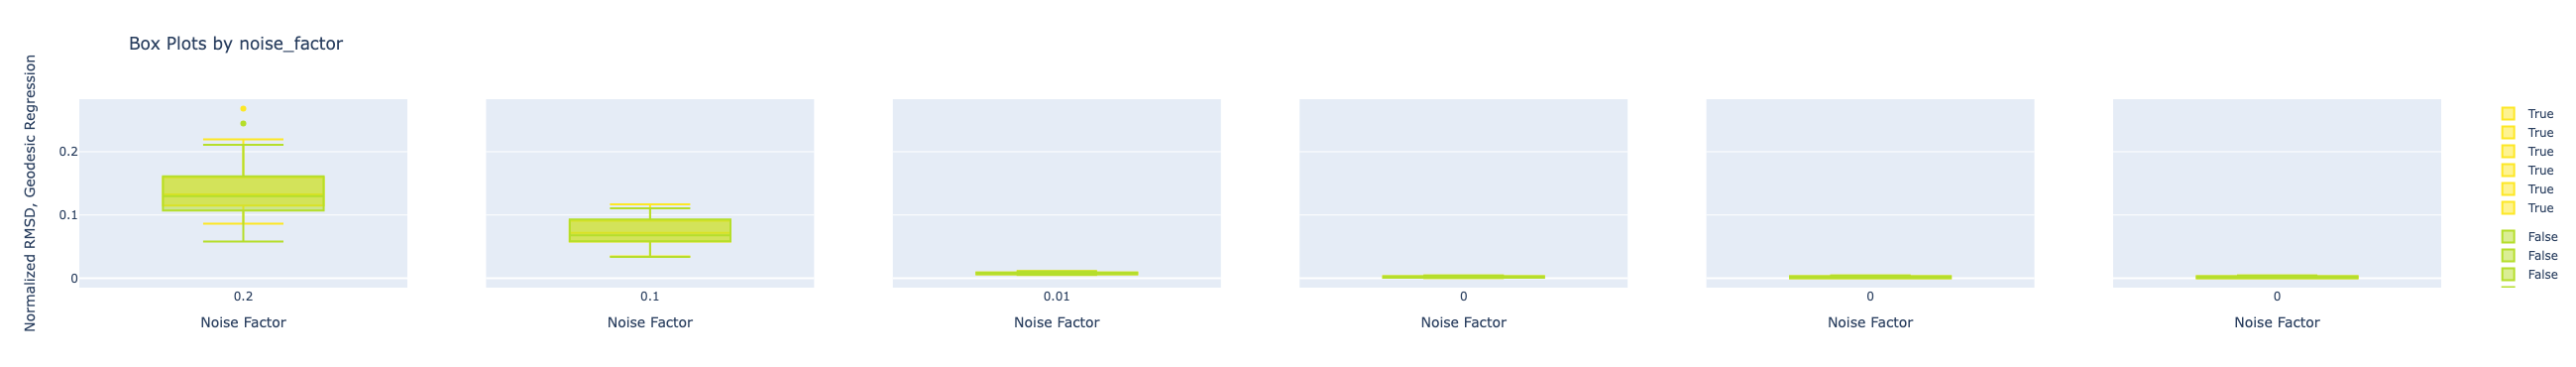

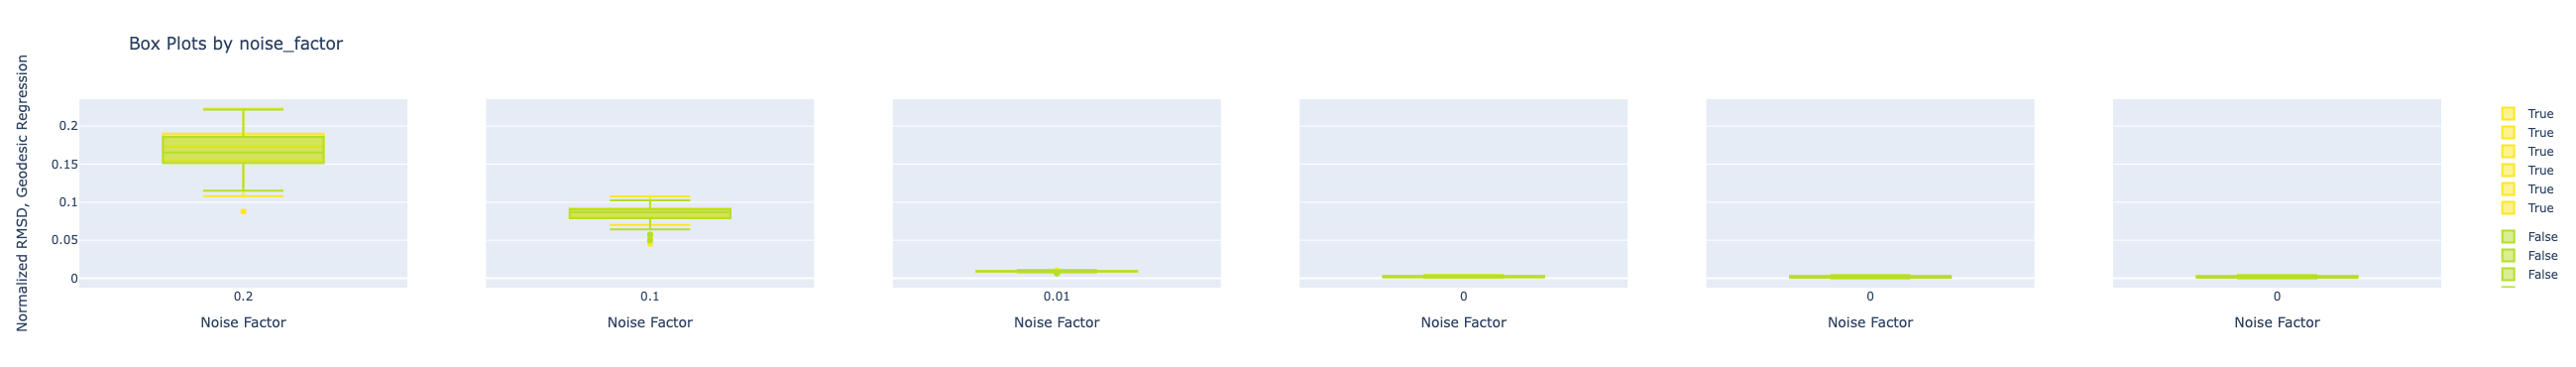

In [13]:
for df in dfs:
    fig = viz.modified_boxplot_evaluation(
        df= df,
        colored_by="linear_residuals",
        marked_by="noise_factor",
        x_label= "noise_factor",   #"geodesic_duration_time",
        y_label="nrmsd_geod",
    )

3. RMSD geodesic as a function of noise level (same plot as above, but we want to record the geodesic formulation of the RMSD)

4. Number of iterations as a function of the sample size n_X

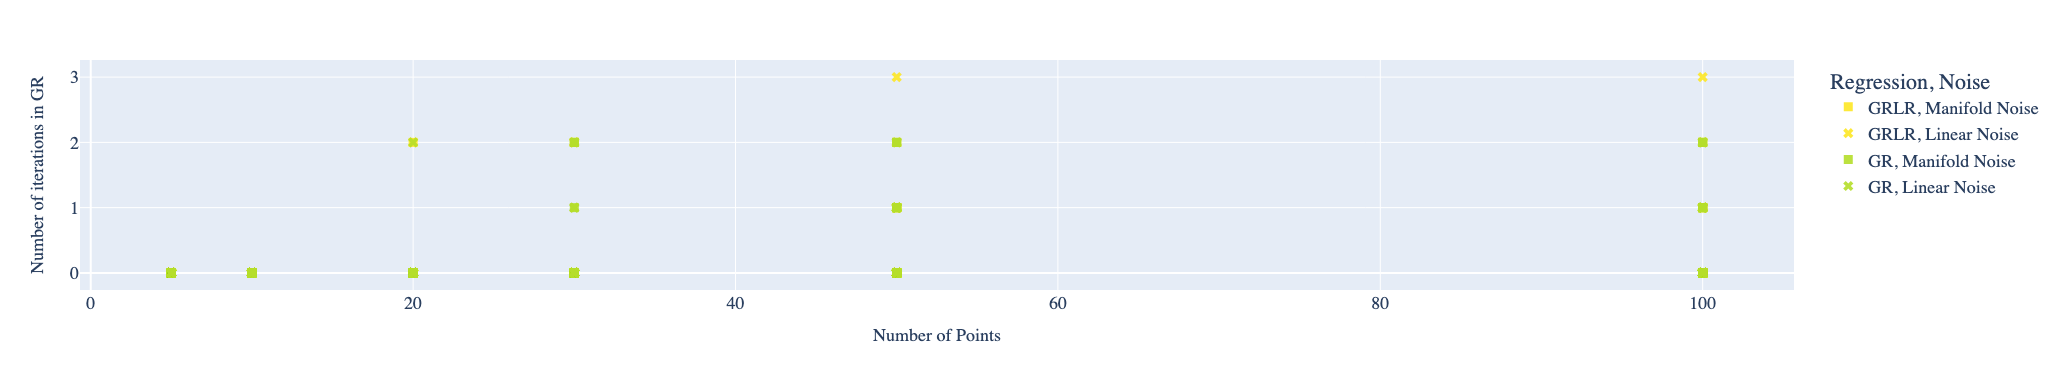

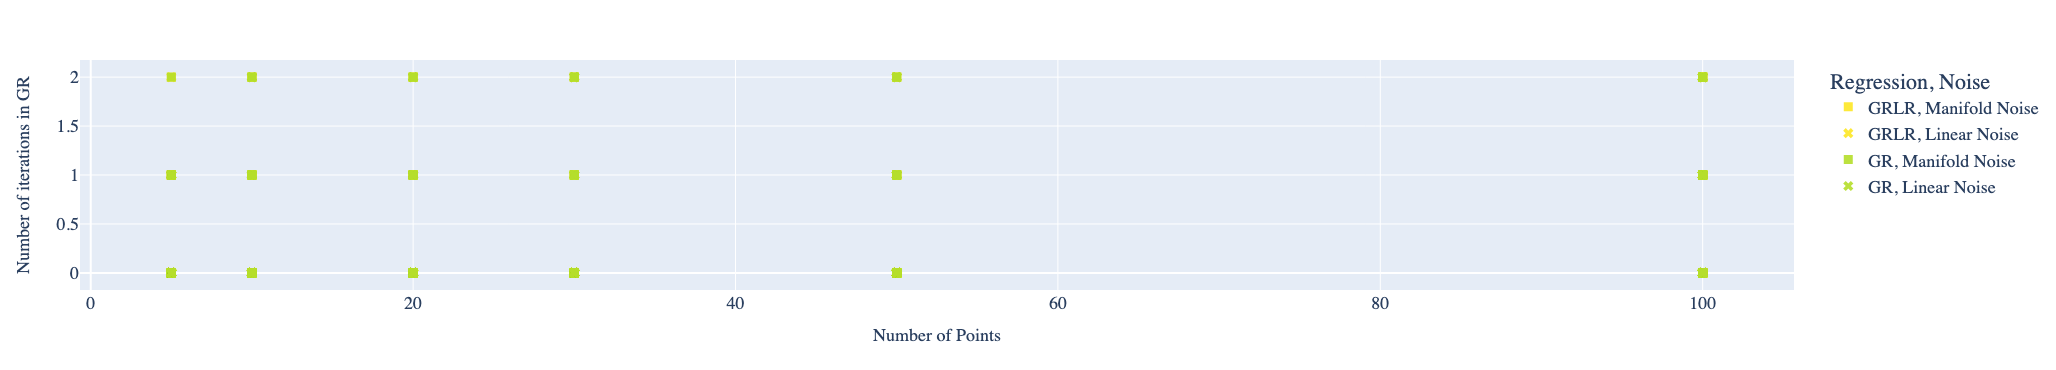

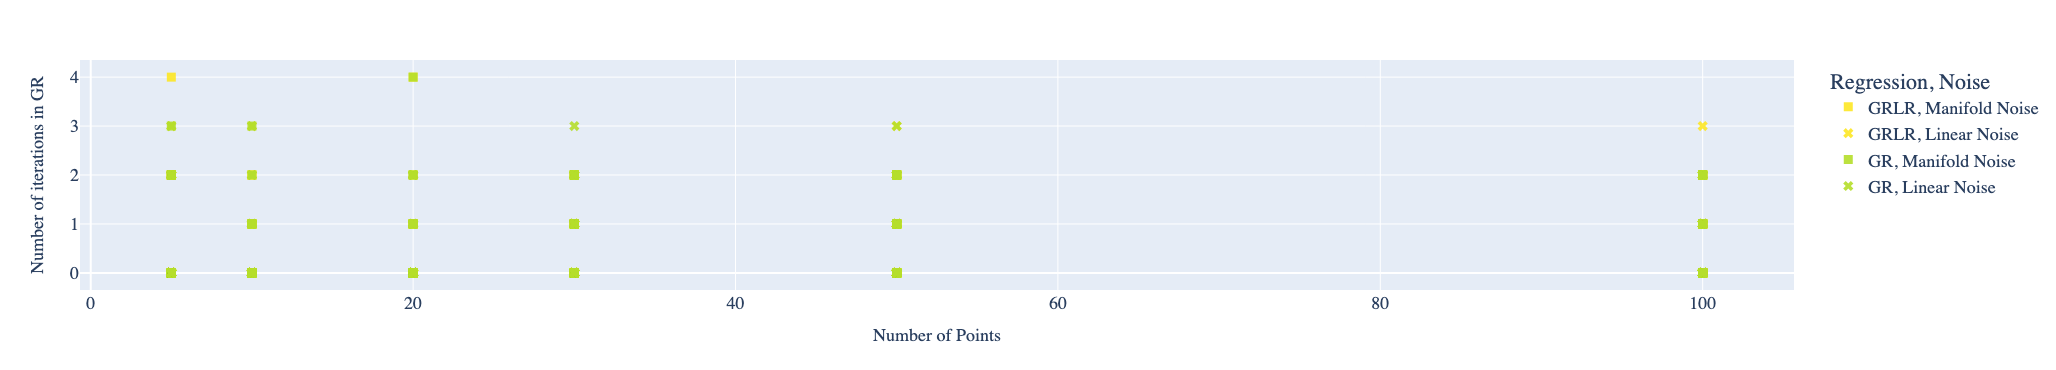

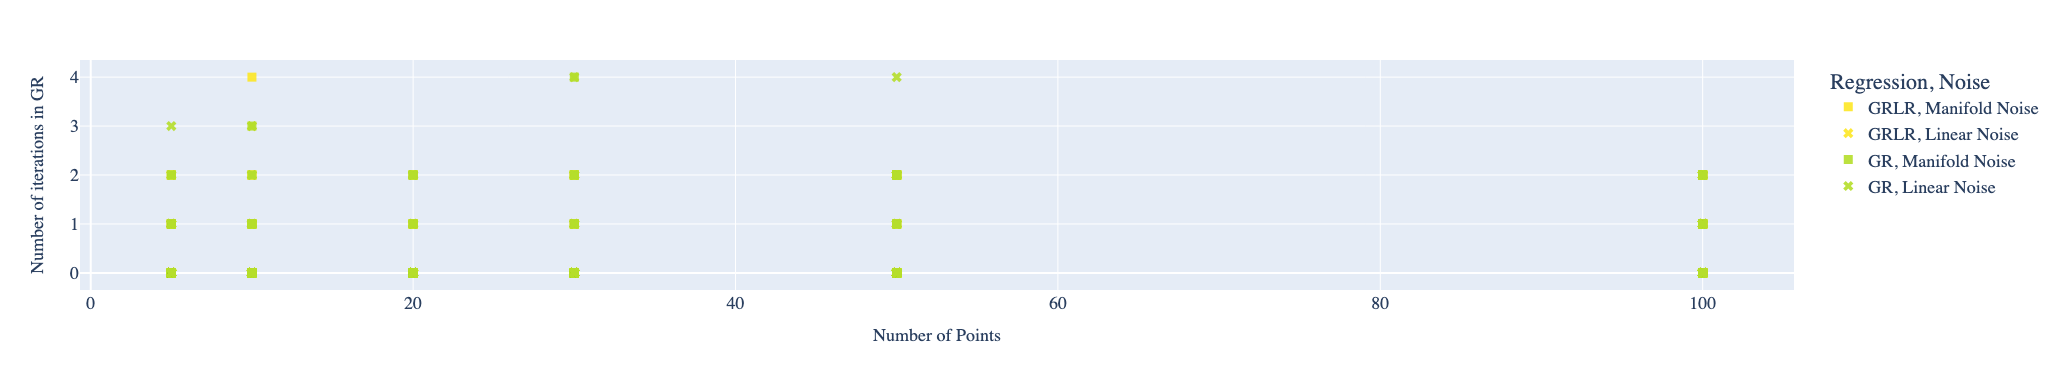

In [7]:
for df in dfs:
    fig = viz.scatterplot_evaluation(
        df= df,
        colored_by="linear_residuals",
        marked_by="linear_noise",
        x_label= "n_X",
        y_label="n_geod_iterations",   #"n_geod_function_evaluations",
    )

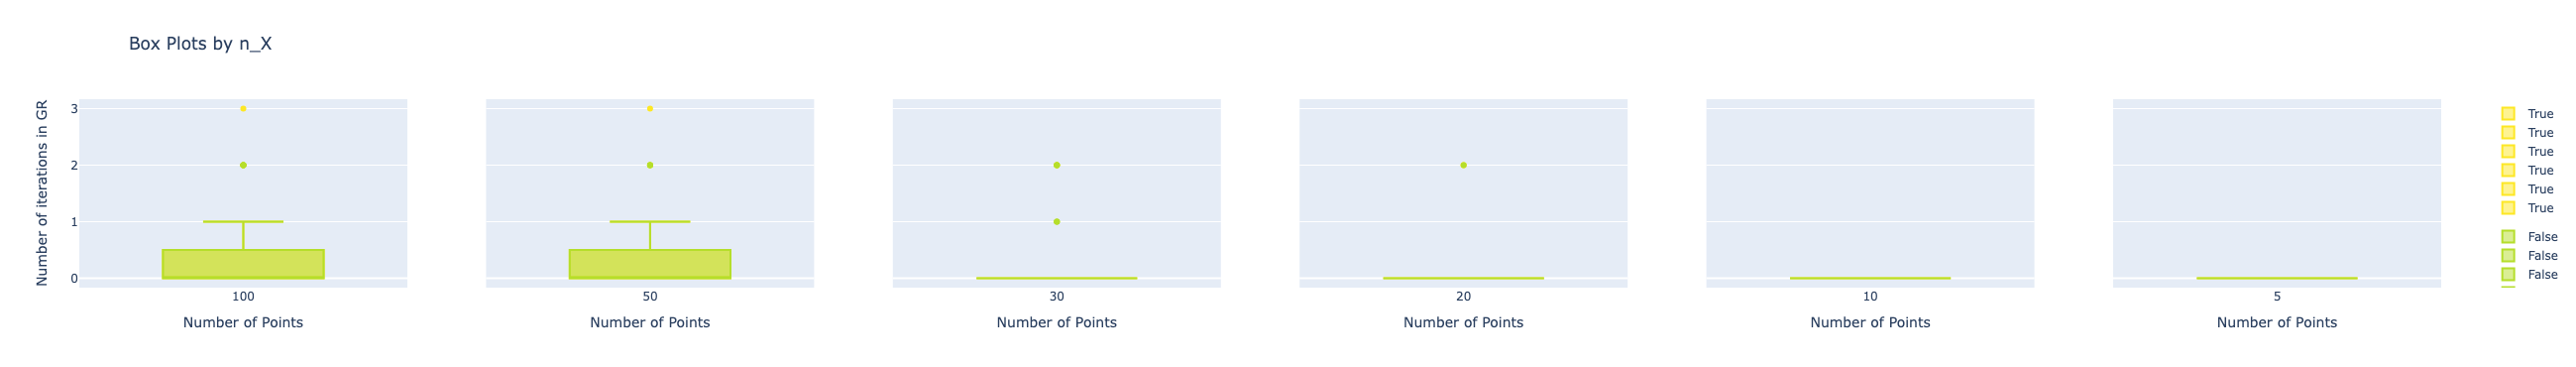

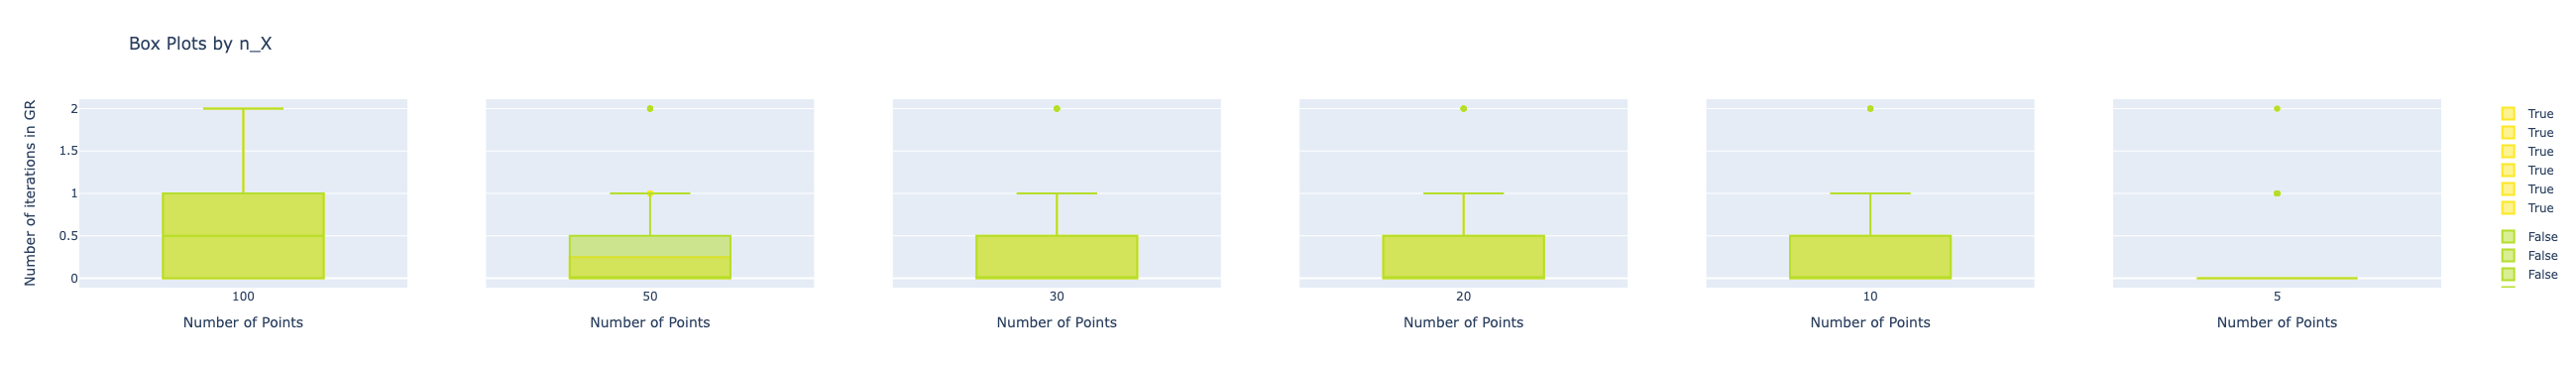

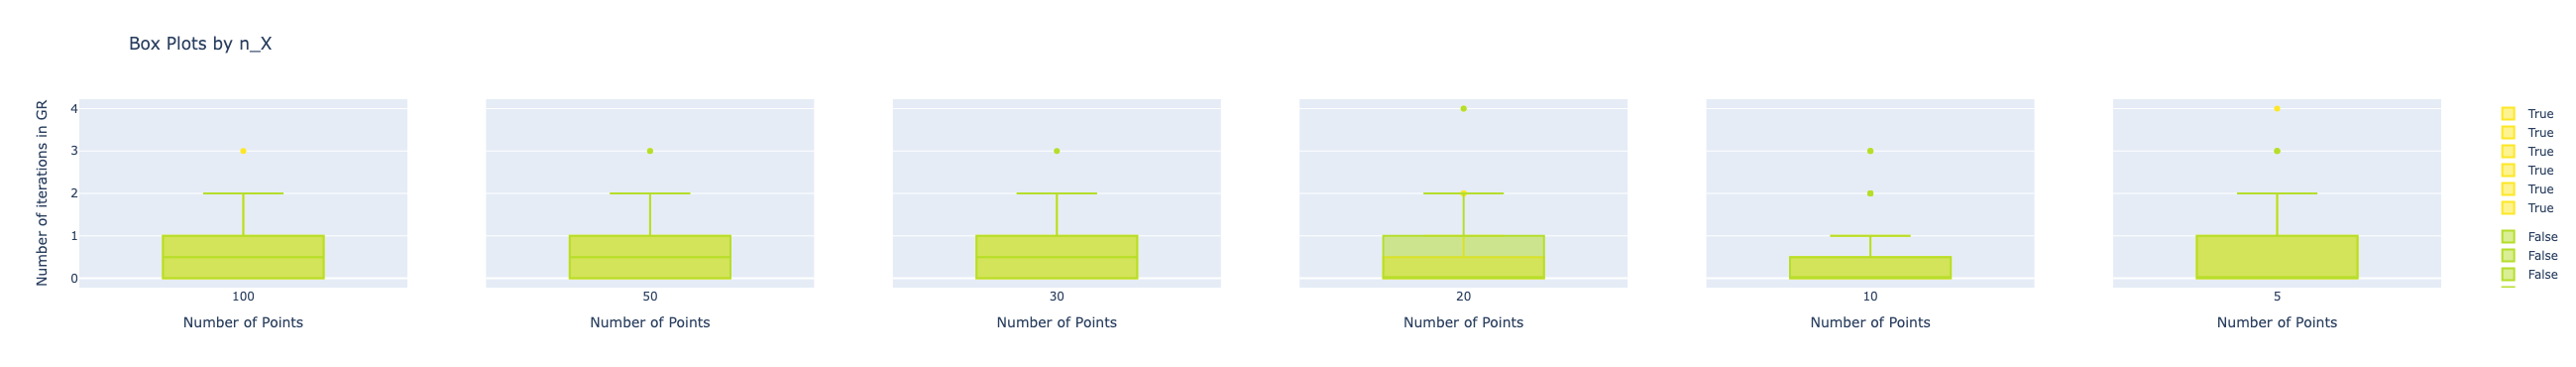

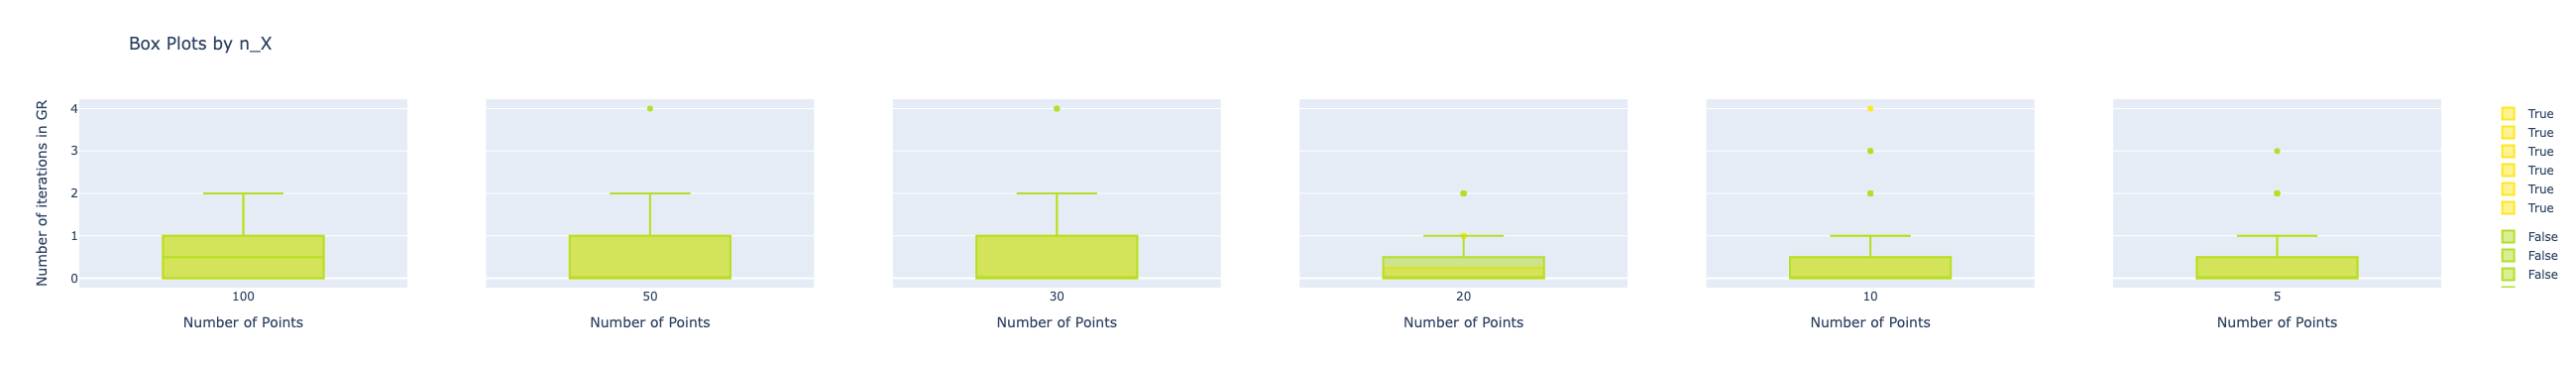

In [14]:
for df in dfs:
    fig = viz.modified_boxplot_evaluation(
        df= df,
        colored_by="linear_residuals",
        marked_by="n_X",
        x_label= "n_X",
        y_label="n_geod_iterations",   #"n_geod_function_evaluations",
    )

# Meeting with Nina: plots from white board

1. Visualization of one training --> Go to notebook 10

In [9]:
dim = 2
n_X = 30
space = Hyperbolic(dim=dim, default_coords_type="extrinsic")

In [10]:
true_sequence = space.metric.geodesic()

TypeError: Connection.geodesic() missing 1 required positional argument: 'initial_point'

In [ ]:
viz.benchmark_data_sequence(space=space, sequence_1=true_sequence, sequence_2 = , sequence_3 = )

4a.hyperboloid

4b.hypersphere

## New viz function

In [117]:
df5 = df5[df5["noise_factor"] == noise_factor]

fig = viz.scatterplot_evaluation(
    df= df5,
    colored_by="linear_residuals",
    marked_by="linear_noise",
    x_label= "n_geod_function_evaluations",   #"geodesic_duration_time",
    y_label="nrmsd_geod",
)

KeyError: 'n_geod_function_evaluations'

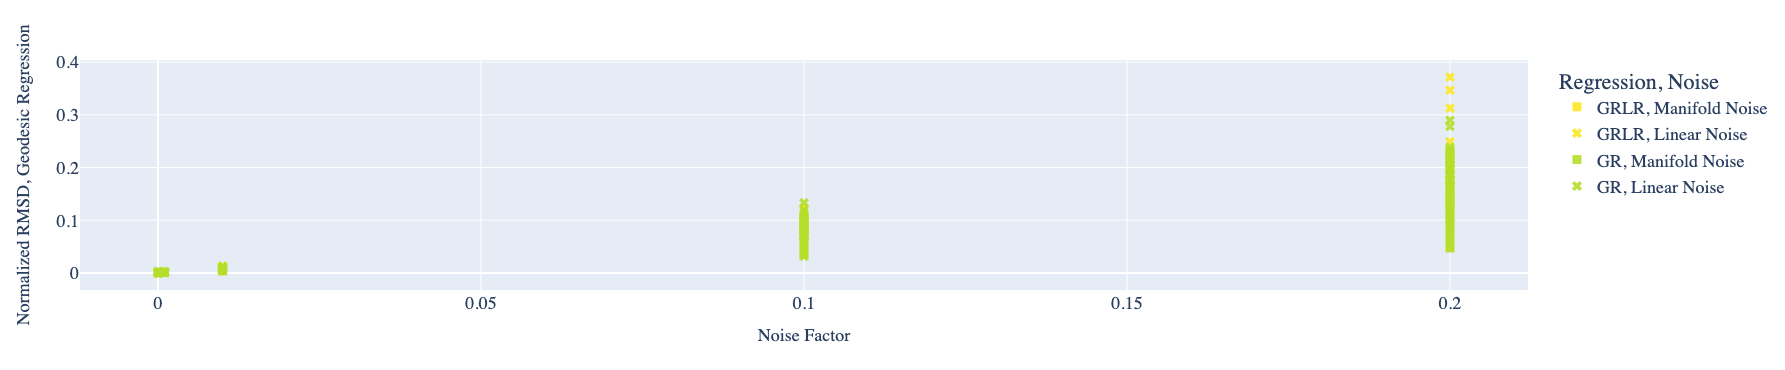

In [104]:
fig = viz.scatterplot_evaluation(
    df= df5,
    colored_by="linear_residuals",
    marked_by="linear_noise",
    x_label="noise_factor",
    y_label="nrmsd_geod",
)